In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte1

## 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [7]:
x = np.full(1000,fill_value=True)
print("Memory size of numpy array in bytes:",
      x.size * x.itemsize)

Memory size of numpy array in bytes: 1000


## 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [16]:
np.flip(np.arange(2,101,2))[-10:]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

## 3. Dado el array


In [23]:
data=np.array([[2,4,5,6], [0,3,7,4], [8,8,5,2], [1,5,6,1]])
data

array([[2, 4, 5, 6],
       [0, 3, 7, 4],
       [8, 8, 5, 2],
       [1, 5, 6, 1]])

## Seleccione con una instrucción el subarray de elementos

In [22]:
np.array([0, 3, 7, 4])

array([0, 3, 7, 4])

### Solucion

In [26]:
data[1:2]

array([[0, 3, 7, 4]])

## Después, seleccione el subarray de elementos

In [19]:
np.array([[2,5], [8,5]])

array([[2, 5],
       [8, 5]])

### Solucion

In [40]:
np.delete(np.delete(data[0:3,0:3],1,1), 1,0)

array([[2, 5],
       [8, 5]])

## 4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9]

## Obtenga la media aritmética de la diferencia (a-b)

In [41]:
a = np.array( [1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
(a-b).mean()

-0.25

## 5.  Tengo valores de cordenadas (x, y) en las columnas del array

In [46]:
data = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
data

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ]])

In [48]:
data = np.vstack([data, [37.1, -3.6]])
data.shape

(4, 2)

## 6.  Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [51]:
np.hstack((data.transpose(), [[10.8, 35.8],[3.0, 12.0]]))

array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ,  3.  , 12.  ]])

# Parte 2

In [55]:
df = pd.read_csv('nucleospoblacion.csv')

## 1.  ¿Cuántos Municipios tienen más de 100000 habitantes?

In [66]:
len(df[df.Poblacion > 100000]["Municipio"].unique())

62

## 2. Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor

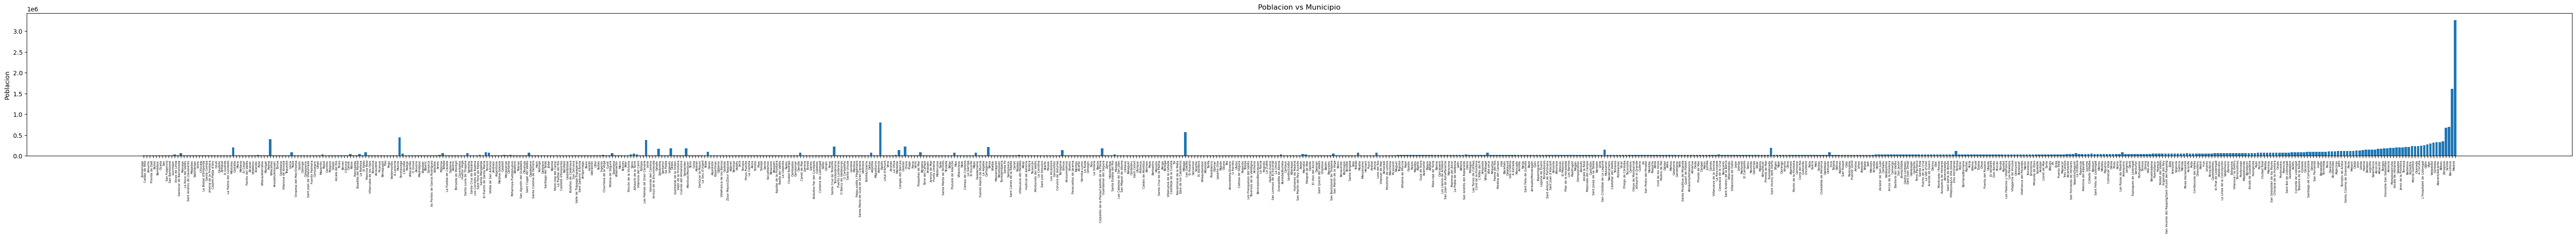

In [101]:
data=df[["Municipio", "Poblacion"]].sort_values(by=['Poblacion'])
fig, ax = plt.subplots()
fig.set_figwidth(75)
ax.bar(data["Municipio"], data["Poblacion"])
ax.set_ylabel('Poblacion')
ax.set_title('Poblacion vs Municipio')
fig.autofmt_xdate(rotation=90)
ax.xaxis.set_tick_params(labelsize=5)
plt.show()

### Responda
#### ¿Cuál es la segunda ciudad más poblada?

Barcelona

#### ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [109]:
data=df[["Municipio", "Poblacion"]].sort_values(by=['Poblacion']).reset_index(drop=True)
data[data.Municipio == "Granada"]

,Municipio,Poblacion
834,Granada,239154.0


Ocupa la posicion 834

## 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [117]:
df.Provincia.unique()

array(['Las Palmas', 'Santa Cruz de Tenerife', 'Badajoz', 'Cáceres',
       'Cádiz', 'A Coruña', 'Huelva', 'León', 'Lugo', 'Ourense',
       'Asturias', 'Pontevedra', 'Salamanca', 'Sevilla', 'Albacete',
       'Alacant/Alicante', 'Álava', 'Almería', 'Ávila', 'Burgos',
       'Castelló/Castellón', 'Ciudad Real', 'Córdoba', 'Cuenca',
       'Granada', 'Guadalajara', 'Guipúzcoa', 'Huesca', 'Jaén',
       'La Rioja', 'Madrid', 'Málaga', 'Murcia', 'Navarra', 'Palencia',
       'Cantabria', 'Segovia', 'Soria', 'Teruel', 'Toledo',
       'València/Valencia', 'Valladolid', 'Vizcaya', 'Zamora', 'Zaragoza',
       'Ceuta', 'Illes Balears', 'Barcelona', 'Girona', 'Lleida',
       'Tarragona', 'Melilla'], dtype=object)

No existe una provincia llamda extremadura. Sin embargo segun https://www.twinkl.es/teaching-wiki/provincias-de-espana se asemeja a Badajoz por lo que usare esa

In [122]:
df[(df.Provincia == "Badajoz") & (df.Poblacion > 5000)]["Municipio"].count()

9

## 4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población

In [128]:
df.loc[df['Y'].idxmax()]["Municipio"]

'Viveiro'

## 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada

In [134]:
df[df.Provincia == "Granada"]["Poblacion"].describe()

count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64

In [136]:
f"median: {df[df.Provincia == 'Granada']['Poblacion'].median()}"

'median: 17526.0'

## 6. Realice un histograma con la población de los Municipios para cada una de las provincias.

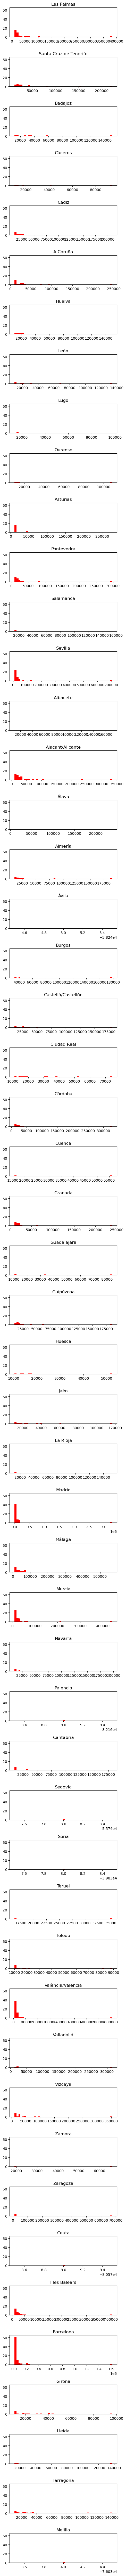

In [161]:
columns = 1
provincias=df.Provincia.unique()
rows = int(len(provincias)/columns)
fig, axs = plt.subplots(rows, columns, sharey=True, tight_layout=True)
fig.set_figwidth(5)
fig.set_figheight(100)
for index, provincia in enumerate(provincias):
    axs[index].hist(df[df.Provincia == provincia]['Poblacion'], bins=50, color='red')
    axs[index].set_title(provincia)

## 7.  Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [187]:
def get_sample():
    sample = df.sample(n = 50)
    if len(sample["Municipio"].unique()) != 50:
        return get_sample()
    else:
        return sample
sample = get_sample()
print(f"Promedio: {sample['Poblacion'].mean()}")
print(f"Desviacion estandar: {sample['Poblacion'].std()}")

Promedio: 80477.32
Desviacion estandar: 234592.5014697057


In [184]:
df[df.Municipio == "Madrid"]["X"]

355   -3.703797
Name: X, dtype: float64

## 8. Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero 

In [175]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)
latitud_madrid = df[df.Municipio == "Madrid"]["Y"]
longitud_madrid = df[df.Municipio == "Madrid"]["X"]
df['Distancia_a_madrid'] = df.apply(lambda row: distance(latitud_madrid, row["Y"], longitud_madrid,row["X"] ), axis = 1)

In [180]:
df.sort_values(by=['Distancia_a_madrid'])[["Municipio", "Distancia_a_madrid"]]

,Municipio,Distancia_a_madrid
355,Madrid,0.000000
783,Pozuelo de Alarcón,6.909765
781,Leganés,9.187839
365,Pozuelo de Alarcón,9.722069
780,Getafe,10.321509
...,...,...
21,Adeje,1813.157106
764,Adeje,1817.615778
765,Arona,1818.115958
35,Santa Cruz de la Palma,1828.562650
